In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


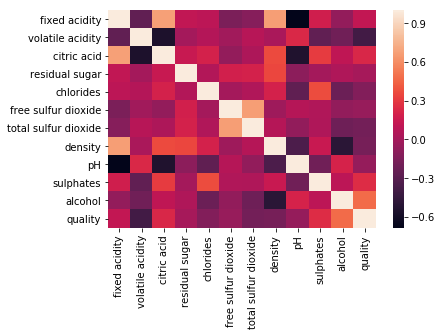

In [5]:
sb.heatmap(df.corr())

Text(0,0.5,'Quality')

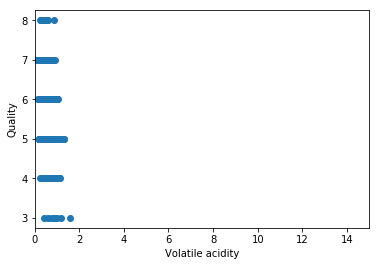

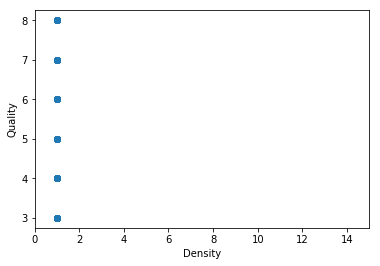

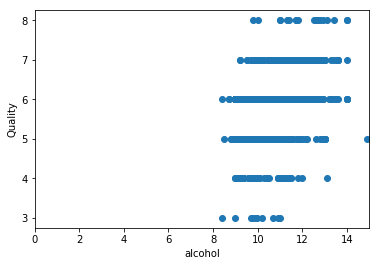

In [18]:
plt.figure()
plt.plot(df['volatile acidity'], df['quality'], linestyle='None', marker='o')
plt.xlabel('Volatile acidity')
plt.xlim((0, 15))
plt.ylabel('Quality')

plt.figure()
plt.plot(df['density'], df['quality'], linestyle='None', marker='o')
plt.xlabel('Density')
plt.xlim((0, 15))
plt.ylabel('Quality')

plt.figure()
plt.plot(df['alcohol'], df['quality'], linestyle='None', marker='o')
plt.xlabel('alcohol')
plt.xlim((0, 15))
plt.ylabel('Quality')

In [7]:
lm = LinearRegression()

#Important functions
#lm.fit()
#lm.predict()
#lm.score()

#data set distribution
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [8]:
#get the fitting curve
lm_model = lm.fit(X_train, y_train)

In [9]:
lm_model.coef_

array([ 4.17074122e-02, -1.16668938e+00, -2.56507759e-01,  1.79817344e-02,
       -1.78766255e+00,  4.92840577e-03, -3.55180773e-03, -3.54532471e+01,
       -3.85018653e-01,  8.83715942e-01,  2.63878947e-01])

In [10]:
obtained_y_test = lm.predict(X_test)

(0, 15)

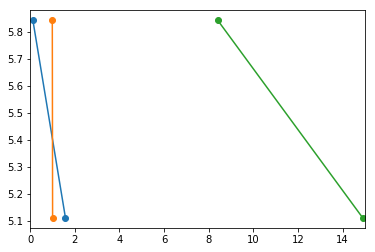

In [19]:
pointa = X.min()
pointb = X.max()
y =  lm.predict([pointa, pointb])
plt.plot([pointa['volatile acidity'], pointb['volatile acidity']], y, marker='o')
plt.plot([pointa['density'], pointb['density']], y, marker='o')
plt.plot([pointa['alcohol'], pointb['alcohol']], y, marker='o')
plt.xlim((0, 15))


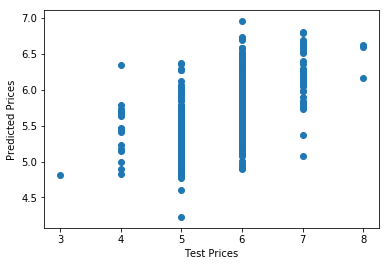

In [20]:
#scatter plot of obtained_y_test with y_test
plt.scatter(y_test, obtained_y_test)
plt.xlabel("Test Prices")
plt.ylabel("Predicted Prices")
plt.show()

### For what qualities will give this good predictions?